YOLOv11 클론 및 설치

In [1]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 80340, done.
remote: Counting objects: 100% (1649/1649), done.
remote: Compressing objects: 100% (970/970), done.
remote: Total 80340 (delta 1183), reused 690 (delta 679), pack-reused 78691 (from 3)
Receiving objects: 100% (80340/80340), 44.08 MiB | 31.56 MiB/s, done.
Resolving deltas: 100% (60109/60109), done.
/content/ultralytics


In [2]:
!pip install ultralytics
!pip install -q tensorboard  # TensorBoard 명시적 설치
print('✅ 설치 완료')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.9 MB/s eta 0:00:00
✅ 설치 완료


In [3]:
from ultralytics import YOLO

model = YOLO("yolo11m.pt")  # nano
print(model)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn)

로보플로우 데이터셋 설치

In [4]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 139.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [1]:
from roboflow import Roboflow

rf = Roboflow(api_key="SFIrLz8339Xz1NlVawMe")

project = rf.workspace("angel-espinoza").project("rsna-pneumonia-detector-vgwkt")
dataset = project.version(1).download("yolov11")
!ls -la

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rsna-pneumonia-detector-1 in yolov11:: 100%|██████████| 27000/27000 [00:02<00:00, 9488.62it/s] 


total 24
drwxr-xr-x 1 root root 4096 Jan 14 17:35 .
drwxr-xr-x 1 root root 4096 Jan 14 17:21 ..
drwxr-xr-x 4 root root 4096 Dec  9 14:41 .config
drwxr-xr-x 5 root root 4096 Jan 14 17:35 rsna-pneumonia-detector-1
drwxr-xr-x 1 root root 4096 Dec  9 14:42 sample_data
drwxr-xr-x 9 root root 4096 Jan 14 17:35 ultralytics


데이터셋 시각화

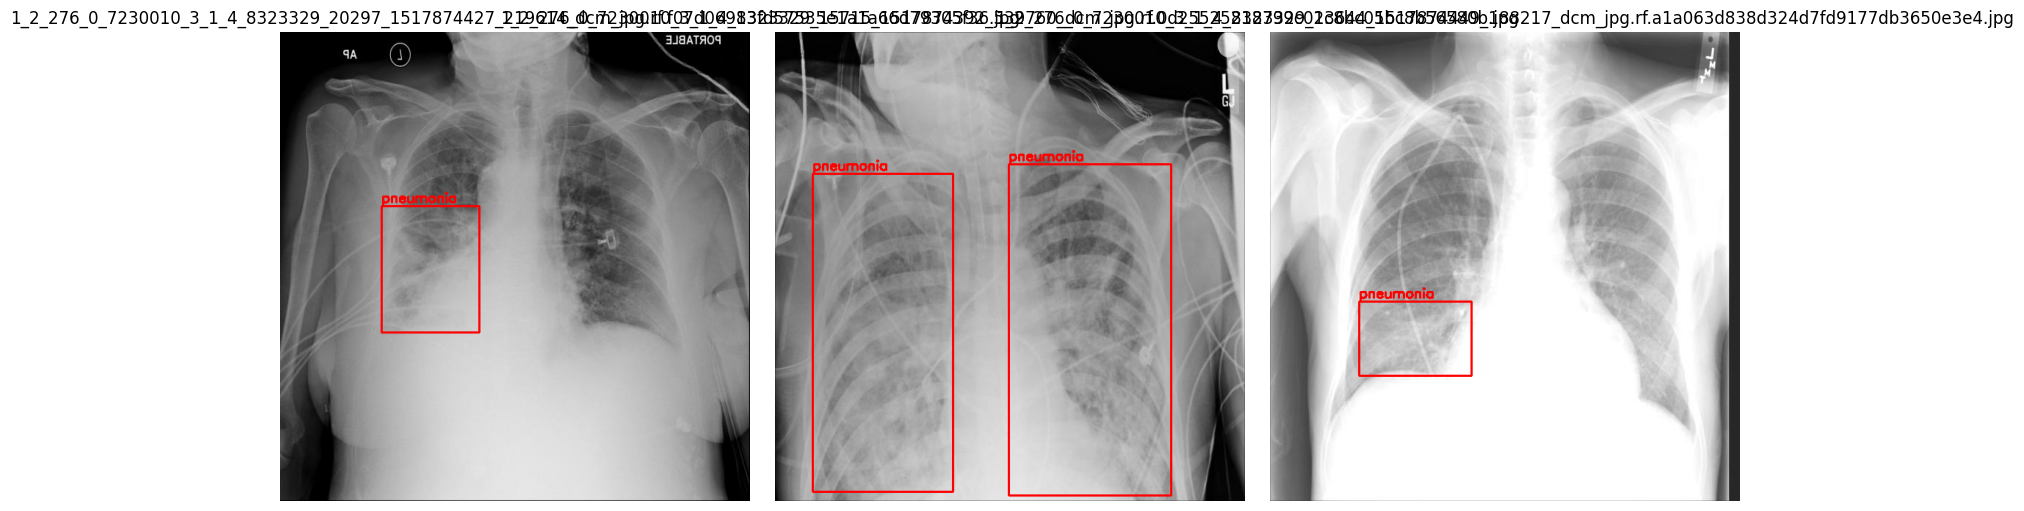

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# ====== 경로 설정 ======
DATASET_DIR = "/content/rsna-pneumonia-detector-1"
IMAGE_DIR = os.path.join(DATASET_DIR, "train/images")
LABEL_DIR = os.path.join(DATASET_DIR, "train/labels")

# ====== 이미지 목록 ======
image_files = [f for f in os.listdir(IMAGE_DIR) if f.endswith((".jpg", ".png"))]

# 랜덤 3개 선택
sample_images = random.sample(image_files, 3)

# ====== 시각화 ======
plt.figure(figsize=(15, 5))

for idx, img_name in enumerate(sample_images):
    img_path = os.path.join(IMAGE_DIR, img_name)
    label_path = os.path.join(LABEL_DIR, img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

    # 이미지 로드
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # 라벨 파일 있으면 box 그리기
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x, y, bw, bh = map(float, line.split())

                # YOLO → pixel 좌표 변환
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)

                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(
                    img,
                    "pneumonia",
                    (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (255, 0, 0),
                    2
                )

    # subplot 출력
    plt.subplot(1, 3, idx + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

학습

In [3]:
from ultralytics import YOLO

print('🚀 학습 시작')
print('=' * 50)
print('모델: YOLOv11s | 이미지: 640 | 배치: 32 | 에폭: 50')
print('=' * 50)

model = YOLO("yolo11s.pt")

model.train(
    data="/content/rsna-pneumonia-detector-1/data.yaml",
    imgsz=640,
    batch=32,
    epochs=50,
    name="pneumonia_results",
    cache=True,
    patience=50
)

print('\n✅ 학습 완료')

🚀 학습 시작
모델: YOLOv11s | 이미지: 640 | 배치: 32 | 에폭: 50
Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rsna-pneumonia-detector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=pneumonia_results, nbs=64, nms=False, opset=None, opt

(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

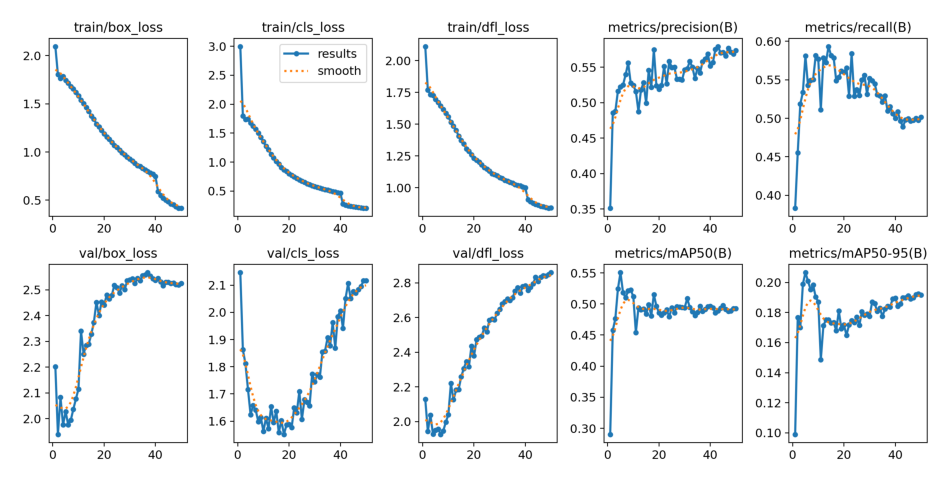

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/ultralytics/runs/detect/pneumonia_results/results.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

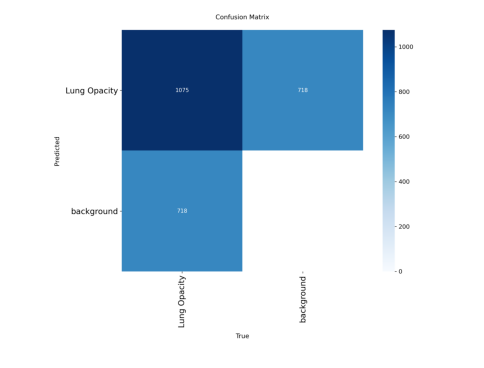

In [5]:
img = Image.open("/content/ultralytics/runs/detect/pneumonia_results/confusion_matrix.png")
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")

데이터 증강 - 실험2 버전

In [6]:
import os
import glob
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm

# -----------------------------
# 유틸: YOLO 라벨 읽기/쓰기
# -----------------------------
def read_yolo_labels(txt_path):
    boxes = []
    if not os.path.exists(txt_path):
        return boxes
    with open(txt_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x, y, w, h = parts
            x, y, w, h = float(x), float(y), float(w), float(h)
            if w <= 0 or h <= 0:
                continue
            boxes.append((int(cls), x, y, w, h))
    return boxes

def write_yolo_labels(txt_path, boxes):
    os.makedirs(os.path.dirname(txt_path), exist_ok=True)
    with open(txt_path, "w") as f:
        for cls, x, y, w, h in boxes:
            f.write(f"{cls} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")

# -----------------------------
# CXR용 증강 : 명암/대비/감마/CLAHE만
# -----------------------------
def build_cxr_augment_intensity_only():
    return A.Compose(
        [
            A.OneOf([
                A.RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15, p=1.0),
                A.RandomGamma(gamma_limit=(85, 115), p=1.0),
                A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=1.0),
            ], p=1.0),
        ]
    )

# -----------------------------
# 메인: 폴더 단위 증강 (images + labels)
# -----------------------------
def augment_yolo_dataset_intensity_only(
    images_dir,
    labels_dir,
    out_images_dir,
    out_labels_dir,
    n_aug_per_image=1,
    force_single_class=True
):
    os.makedirs(out_images_dir, exist_ok=True)
    os.makedirs(out_labels_dir, exist_ok=True)

    aug = build_cxr_augment_intensity_only()

    img_paths = []
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        img_paths.extend(glob.glob(os.path.join(images_dir, ext)))

    print(f"Found images: {len(img_paths)}")

    for img_path in tqdm(img_paths):
        base = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(labels_dir, base + ".txt")

        # 이미지 로드 (grayscale -> 3채널)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        yolo_boxes = read_yolo_labels(label_path)

        # RSNA 단일 클래스 통일(선택)
        if force_single_class and len(yolo_boxes) > 0:
            yolo_boxes = [(0, x, y, w, h) for (cls, x, y, w, h) in yolo_boxes]

        for k in range(n_aug_per_image):
            transformed = aug(image=img_bgr)
            aug_img = transformed["image"]

            out_name = f"{base}_aug{k}"
            out_img_path = os.path.join(out_images_dir, out_name + ".jpg")
            out_lbl_path = os.path.join(out_labels_dir, out_name + ".txt")

            cv2.imwrite(out_img_path, aug_img)
            # 좌표 변형 없으므로 라벨 그대로 저장
            write_yolo_labels(out_lbl_path, yolo_boxes)

    print("Done intensity-only augmentation!")


train_images = "/content/rsna-pneumonia-detector-1/train/images"
train_labels = "/content/rsna-pneumonia-detector-1/train/labels"

out_train_images = "/content/rsna-pneumonia-detector-1/train_aug/images"
out_train_labels = "/content/rsna-pneumonia-detector-1/train_aug/labels"

augment_yolo_dataset_intensity_only(
    images_dir=train_images,
    labels_dir=train_labels,
    out_images_dir=out_train_images,
    out_labels_dir=out_train_labels,
    n_aug_per_image=2,
    force_single_class=True
)

Found images: 11796


100%|██████████| 11796/11796 [02:22<00:00, 82.58it/s]

Done intensity-only augmentation!


데이터 증강 - 실험5 버전

In [7]:
import os
import glob
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm

# -----------------------------
# 유틸: YOLO 라벨 읽기/쓰기
# -----------------------------
def read_yolo_labels(txt_path):
    boxes = []
    if not os.path.exists(txt_path):
        return boxes
    with open(txt_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x, y, w, h = parts
            try:
                cls = int(float(cls))
                x, y, w, h = float(x), float(y), float(w), float(h)
            except:
                continue
            if w <= 0 or h <= 0:
                continue
            boxes.append((cls, x, y, w, h))
    return boxes

def write_yolo_labels(txt_path, boxes):
    os.makedirs(os.path.dirname(txt_path), exist_ok=True)
    with open(txt_path, "w") as f:
        for cls, x, y, w, h in boxes:
            f.write(f"{cls} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")

# -----------------------------
# (1) 항상 적용: Percentile clipping + [0,255] rescale
# -----------------------------
def percentile_clip_and_rescale(img, low=1, high=99):
    # img: uint8 BGR
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    lo = np.percentile(gray, low)
    hi = np.percentile(gray, high)

    if hi <= lo + 1e-6:
        return img

    img_f = img.astype(np.float32)
    img_f = np.clip(img_f, lo, hi)
    img_f = (img_f - lo) / (hi - lo)
    img_f = img_f * 255.0
    return img_f.astype(np.uint8)

# -----------------------------
# (2) CXR 전용: 전처리 + intensity augmentation (좌표 불변)
# -----------------------------
def build_cxr_preprocess_and_intensity_aug(
    clip_low=1, clip_high=99, # 여기 조절
    aug_p=0.8
):
    return A.Compose([
        # ✅ 항상 적용되는 전처리
        A.Lambda(image=lambda x, **kwargs: percentile_clip_and_rescale(x, clip_low, clip_high)),

        # ✅ 가끔만 적용되는 증강(하나만)
        A.OneOf([
            A.RandomBrightnessContrast(brightness_limit=0.12, contrast_limit=0.12, p=1.0),
            A.RandomGamma(gamma_limit=(90, 110), p=1.0),
            A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=1.0),
        ], p=aug_p),
    ])

# -----------------------------
# 메인: 폴더 단위 증강 (images + labels)
# -----------------------------
def augment_yolo_dataset_intensity_only(
    images_dir,
    labels_dir,
    out_images_dir,
    out_labels_dir,
    n_aug_per_image=1,
    force_single_class=True,
    clip_low=1,
    clip_high=99,
    aug_p=0.8
):
    os.makedirs(out_images_dir, exist_ok=True)
    os.makedirs(out_labels_dir, exist_ok=True)

    # ✅ 여기 중요: 새 파이프라인을 사용
    aug = build_cxr_preprocess_and_intensity_aug(
        clip_low=clip_low, clip_high=clip_high,
        aug_p=aug_p
    )

    img_paths = []
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        img_paths.extend(glob.glob(os.path.join(images_dir, ext)))
    img_paths = sorted(img_paths)

    print(f"Found images: {len(img_paths)}")

    for img_path in tqdm(img_paths):
        base = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(labels_dir, base + ".txt")

        # 이미지 로드 (grayscale -> BGR)
        img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img_gray is None:
            continue
        img_bgr = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

        yolo_boxes = read_yolo_labels(label_path)

        # RSNA 단일 클래스 통일(선택)
        if force_single_class and len(yolo_boxes) > 0:
            yolo_boxes = [(0, x, y, w, h) for (cls, x, y, w, h) in yolo_boxes]

        for k in range(n_aug_per_image):
            transformed = aug(image=img_bgr)
            aug_img = transformed["image"]

            out_name = f"{base}_aug{k}"
            out_img_path = os.path.join(out_images_dir, out_name + ".jpg")
            out_lbl_path = os.path.join(out_labels_dir, out_name + ".txt")

            cv2.imwrite(out_img_path, aug_img)
            # ✅ 좌표 변형 없으므로 라벨 그대로 저장
            write_yolo_labels(out_lbl_path, yolo_boxes)

    print("✅ Done preprocess + intensity augmentation!")

# -----------------------------
# 실행
# -----------------------------
train_images = "/content/rsna-pneumonia-detector-1/train/images"
train_labels = "/content/rsna-pneumonia-detector-1/train/labels"

out_train_images = "/content/rsna-pneumonia-detector-1/train_aug/images"
out_train_labels = "/content/rsna-pneumonia-detector-1/train_aug/labels"

augment_yolo_dataset_intensity_only(
    images_dir=train_images,
    labels_dir=train_labels,
    out_images_dir=out_train_images,
    out_labels_dir=out_train_labels,
    n_aug_per_image=2,
    force_single_class=True,
    clip_low=1,
    clip_high=99,
    aug_p=0.8
)

Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().


Found images: 11796


100%|██████████| 11796/11796 [06:58<00:00, 28.21it/s]

✅ Done preprocess + intensity augmentation!


In [7]:
import os, glob

LBL_ORIG = "/content/rsna-pneumonia-detector-1/train/labels"

txts = glob.glob(os.path.join(LBL_ORIG, "*.txt"))
print("label files:", len(txts))

non_empty = 0
sample = None
for p in txts:
    if os.path.getsize(p) > 0:
        non_empty += 1
        if sample is None:
            sample = p

print("non-empty labels:", non_empty)

if sample:
    print("\nSample non-empty file:", sample)
    with open(sample, "r") as f:
        for i, line in enumerate(f.readlines()[:5]):
            print(line.strip())

label files: 11796
non-empty labels: 11796

Sample non-empty file: /content/rsna-pneumonia-detector-1/train/labels/1_2_276_0_7230010_3_1_4_8323329_12900_1517874368_225171_dcm_jpg.rf.e18e1645e7190819e024e78838d29893.txt
0 0.6484375 0.553125 0.1890625 0.16875


In [8]:
import os, shutil, glob

base = "/content/rsna-pneumonia-detector-1"

src_train_img = f"{base}/train/images"
src_train_lbl = f"{base}/train/labels"

src_aug_img = f"{base}/train_aug/images"
src_aug_lbl = f"{base}/train_aug/labels"

dst_img = f"{base}/train_mix/images"
dst_lbl = f"{base}/train_mix/labels"

os.makedirs(dst_img, exist_ok=True)
os.makedirs(dst_lbl, exist_ok=True)

def copy_all(src, dst):
    for p in glob.glob(os.path.join(src, "*")):
        shutil.copy2(p, os.path.join(dst, os.path.basename(p)))

copy_all(src_train_img, dst_img)
copy_all(src_train_lbl, dst_lbl)
copy_all(src_aug_img, dst_img)
copy_all(src_aug_lbl, dst_lbl)

print("✅ train_mix 생성 완료:", dst_img, dst_lbl)

✅ train_mix 생성 완료: /content/rsna-pneumonia-detector-1/train_mix/images /content/rsna-pneumonia-detector-1/train_mix/labels


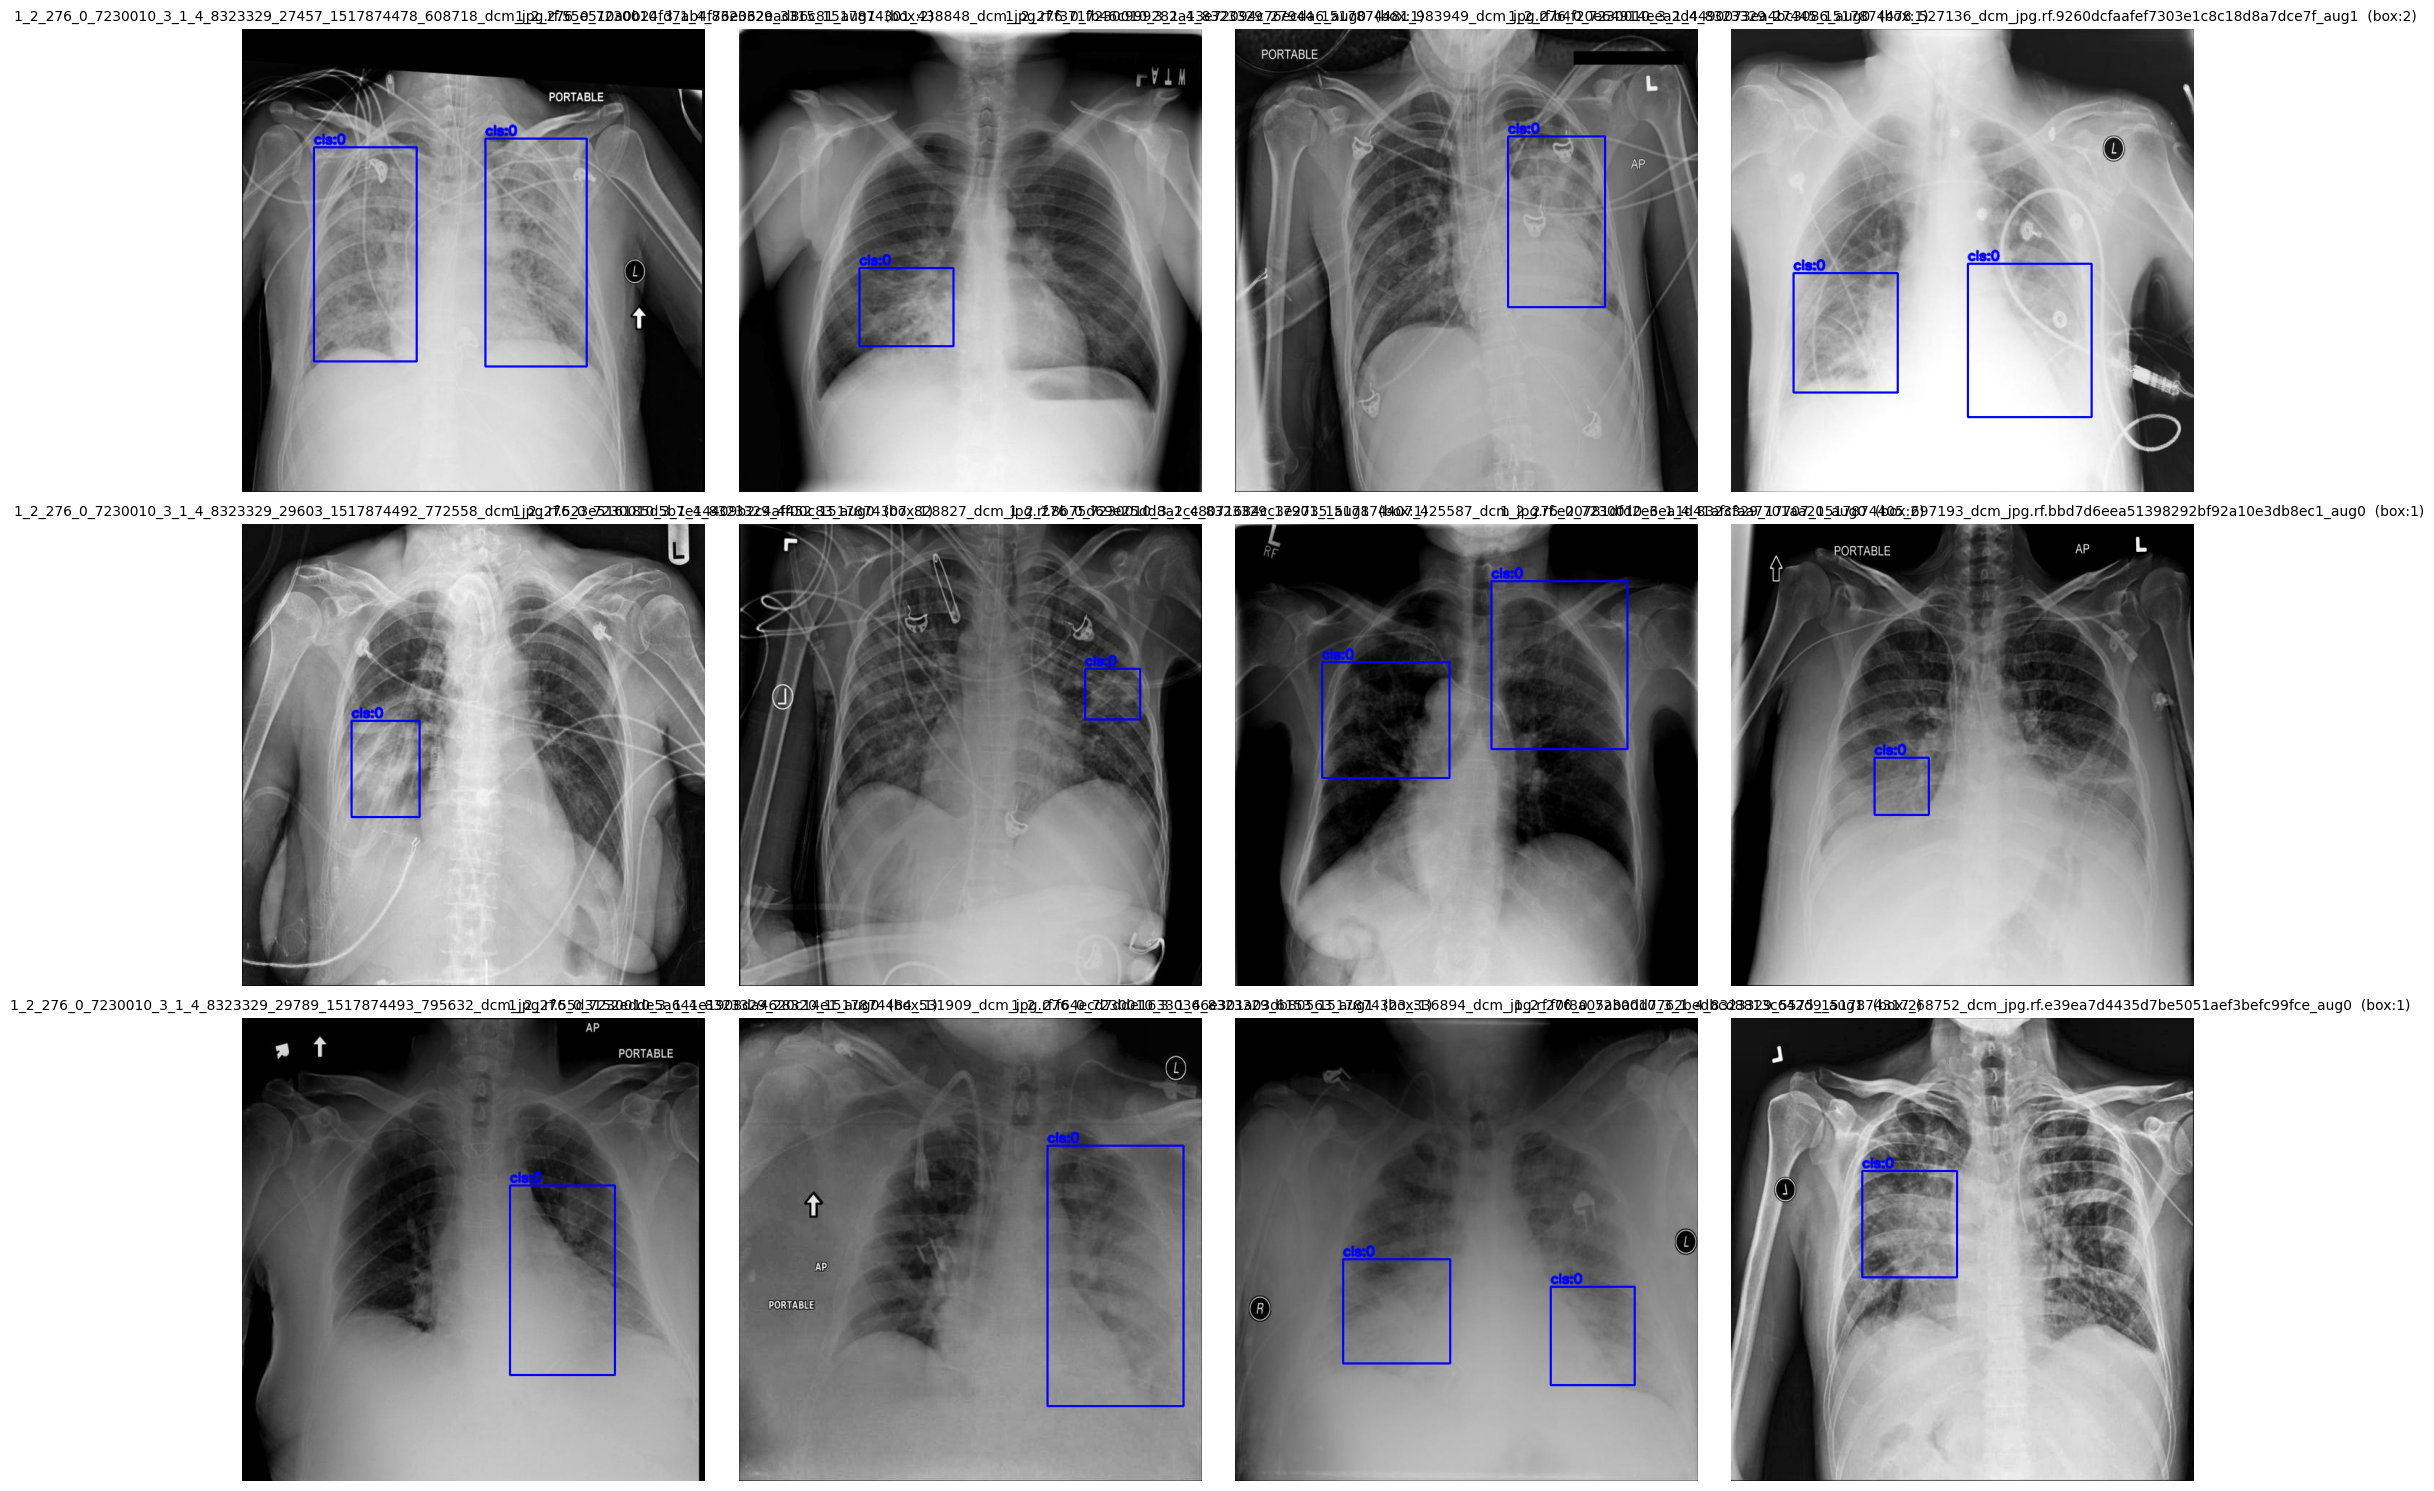

In [9]:
import os
import glob
import random
import cv2
import matplotlib.pyplot as plt

# ====== 여기만 너 경로로 맞춰줘 ======
IMG_DIR = "/content/rsna-pneumonia-detector-1/train_aug/images"
LBL_DIR = "/content/rsna-pneumonia-detector-1/train_aug/labels"
# (원하면 train_mix로 바꿔도 됨)
# IMG_DIR = "/content/drive/MyDrive/.../train_mix/images"
# LBL_DIR = "/content/drive/MyDrive/.../train_mix/labels"
# ====================================

def read_yolo_txt(txt_path):
    """returns list of (cls, x, y, w, h) in normalized YOLO format"""
    boxes = []
    if not os.path.exists(txt_path):
        return boxes
    with open(txt_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x, y, w, h = parts
            try:
                cls = int(float(cls))
                x, y, w, h = float(x), float(y), float(w), float(h)
            except:
                continue
            # 0크기 제거(혹시 남아있다면)
            if w <= 0 or h <= 0:
                continue
            boxes.append((cls, x, y, w, h))
    return boxes

def yolo_to_xyxy(box, W, H):
    """(cls, x,y,w,h normalized) -> (cls, x1,y1,x2,y2 pixels)"""
    cls, x, y, w, h = box
    xc, yc = x * W, y * H
    bw, bh = w * W, h * H
    x1 = int(round(xc - bw / 2))
    y1 = int(round(yc - bh / 2))
    x2 = int(round(xc + bw / 2))
    y2 = int(round(yc + bh / 2))

    # clamp to image bounds (시각화 안전)
    x1 = max(0, min(W - 1, x1))
    y1 = max(0, min(H - 1, y1))
    x2 = max(0, min(W - 1, x2))
    y2 = max(0, min(H - 1, y2))
    return cls, x1, y1, x2, y2

def draw_boxes(img_bgr, boxes, color=(255, 0, 0), thickness=2):
    """Draw boxes on BGR image."""
    out = img_bgr.copy()
    H, W = out.shape[:2]

    for b in boxes:
        cls, x1, y1, x2, y2 = yolo_to_xyxy(b, W, H)
        cv2.rectangle(out, (x1, y1), (x2, y2), color, thickness)
        cv2.putText(out, f"cls:{cls}", (x1, max(0, y1 - 5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2, cv2.LINE_AA)
    return out

def show_random_samples(n=8, seed=42):
    random.seed(seed)
    img_paths = []
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        img_paths.extend(glob.glob(os.path.join(IMG_DIR, ext)))
    img_paths = sorted(img_paths)

    if len(img_paths) == 0:
        raise RuntimeError(f"No images found in: {IMG_DIR}")

    picks = random.sample(img_paths, k=min(n, len(img_paths)))

    cols = 4
    rows = (len(picks) + cols - 1) // cols
    plt.figure(figsize=(5 * cols, 5 * rows))

    for i, img_path in enumerate(picks, start=1):
        base = os.path.splitext(os.path.basename(img_path))[0]
        txt_path = os.path.join(LBL_DIR, base + ".txt")

        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            continue

        boxes = read_yolo_txt(txt_path)
        drawn = draw_boxes(img, boxes)

        # BGR -> RGB for matplotlib
        drawn_rgb = cv2.cvtColor(drawn, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i)
        plt.imshow(drawn_rgb)
        title = base
        if len(boxes) == 0:
            title += "  (NO BOX)"
        else:
            # 박스 값 요약(첫 번째 박스)
            cls, x, y, w, h = boxes[0]
            title += f"  (box:{len(boxes)})"
        plt.title(title, fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# 실행
show_random_samples(n=12, seed=11)

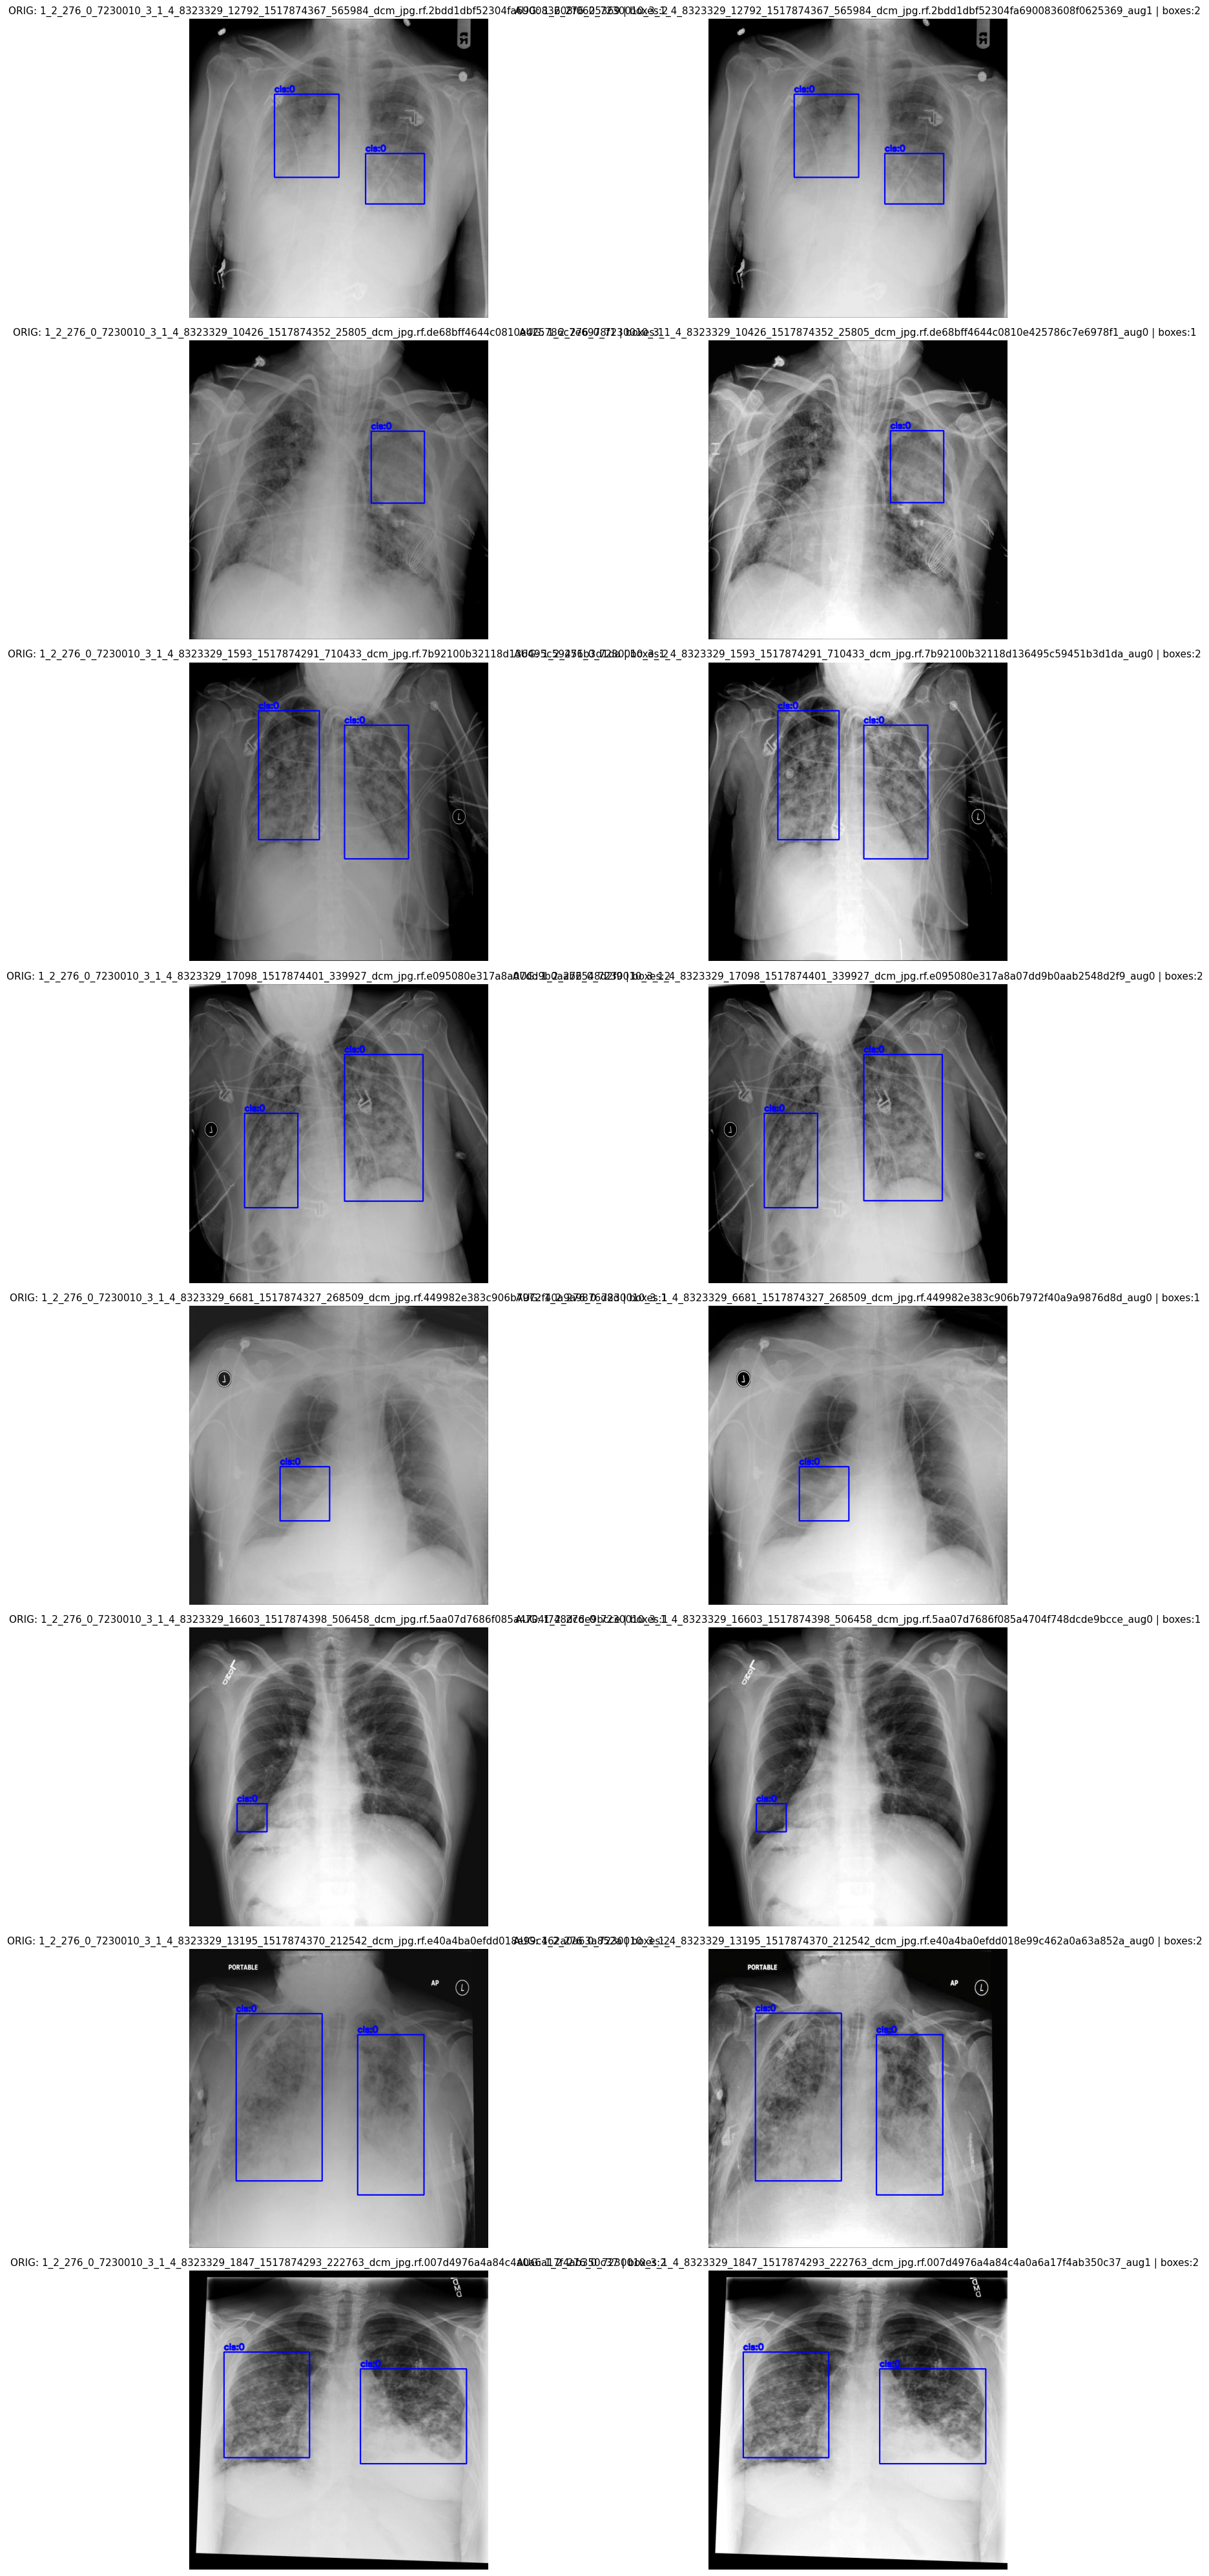

In [8]:
#원본과 증강 이미지 비교 시각화

import os
import glob
import random
import cv2
import matplotlib.pyplot as plt

# ====== 너 경로로 맞춰줘 ======
IMG_DIR_ORIG = "/content/rsna-pneumonia-detector-1/train/images"
LBL_DIR_ORIG = "/content/rsna-pneumonia-detector-1/train/labels"

IMG_DIR_AUG  = "/content/rsna-pneumonia-detector-1/train_aug/images"
LBL_DIR_AUG  = "/content/rsna-pneumonia-detector-1/train_aug/labels"
# ====================================

def read_yolo_txt(txt_path):
    boxes = []
    if not os.path.exists(txt_path):
        return boxes
    with open(txt_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x, y, w, h = parts
            try:
                cls = int(float(cls))
                x, y, w, h = float(x), float(y), float(w), float(h)
            except:
                continue
            if w <= 0 or h <= 0:
                continue
            boxes.append((cls, x, y, w, h))
    return boxes

def yolo_to_xyxy(box, W, H):
    cls, x, y, w, h = box
    xc, yc = x * W, y * H
    bw, bh = w * W, h * H
    x1 = int(round(xc - bw / 2))
    y1 = int(round(yc - bh / 2))
    x2 = int(round(xc + bw / 2))
    y2 = int(round(yc + bh / 2))

    x1 = max(0, min(W - 1, x1))
    y1 = max(0, min(H - 1, y1))
    x2 = max(0, min(W - 1, x2))
    y2 = max(0, min(H - 1, y2))
    return cls, x1, y1, x2, y2

def draw_boxes(img_bgr, boxes, color=(255, 0, 0), thickness=2):
    out = img_bgr.copy()
    H, W = out.shape[:2]
    for b in boxes:
        cls, x1, y1, x2, y2 = yolo_to_xyxy(b, W, H)
        cv2.rectangle(out, (x1, y1), (x2, y2), color, thickness)
        cv2.putText(out, f"cls:{cls}", (x1, max(0, y1 - 5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2, cv2.LINE_AA)
    return out

def find_image_by_base(img_dir, base):
    """img_dir에서 base 이름을 가진 jpg/png/jpeg를 찾아서 반환"""
    for ext in (".jpg", ".jpeg", ".png"):
        p = os.path.join(img_dir, base + ext)
        if os.path.exists(p):
            return p
    return None

def extract_orig_base_from_aug(aug_base):
    """
    증강 파일명 규칙: {orig_base}_aug{k}
    예: abc123_aug0 -> abc123
    """
    if "_aug" in aug_base:
        return aug_base.split("_aug")[0]
    return aug_base

def show_random_aug_pairs(n_pairs=8, seed=42):
    random.seed(seed)

    aug_paths = []
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        aug_paths.extend(glob.glob(os.path.join(IMG_DIR_AUG, ext)))
    aug_paths = sorted(aug_paths)

    if len(aug_paths) == 0:
        raise RuntimeError(f"No augmented images found in: {IMG_DIR_AUG}")

    # 증강 이미지 중에서만 랜덤으로 뽑고, 그에 대응하는 원본이 있는 것만 사용
    random.shuffle(aug_paths)

    pairs = []
    for aug_img_path in aug_paths:
        aug_base = os.path.splitext(os.path.basename(aug_img_path))[0]
        orig_base = extract_orig_base_from_aug(aug_base)

        orig_img_path = find_image_by_base(IMG_DIR_ORIG, orig_base)
        if orig_img_path is None:
            continue  # 원본이 없으면 skip

        pairs.append((orig_base, orig_img_path, aug_base, aug_img_path))
        if len(pairs) >= n_pairs:
            break

    if len(pairs) == 0:
        raise RuntimeError("No (orig, aug) pairs found. Check naming like *_aug0 and folders.")

    # 표시: 한 pair당 2장(원본/증강)
    cols = 2
    rows = len(pairs)
    plt.figure(figsize=(10 * cols, 5 * rows))

    for i, (orig_base, orig_img_path, aug_base, aug_img_path) in enumerate(pairs):
        # ----- 원본 -----
        orig_txt = os.path.join(LBL_DIR_ORIG, orig_base + ".txt")
        orig_img = cv2.imread(orig_img_path, cv2.IMREAD_COLOR)
        orig_boxes = read_yolo_txt(orig_txt)
        orig_drawn = draw_boxes(orig_img, orig_boxes)
        orig_rgb = cv2.cvtColor(orig_drawn, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i * 2 + 1)
        plt.imshow(orig_rgb)
        t = f"ORIG: {orig_base}"
        t += f" | boxes:{len(orig_boxes)}" if len(orig_boxes) else " | NO BOX"
        plt.title(t, fontsize=11)
        plt.axis("off")

        # ----- 증강 -----
        aug_txt = os.path.join(LBL_DIR_AUG, aug_base + ".txt")
        aug_img = cv2.imread(aug_img_path, cv2.IMREAD_COLOR)
        aug_boxes = read_yolo_txt(aug_txt)
        aug_drawn = draw_boxes(aug_img, aug_boxes)
        aug_rgb = cv2.cvtColor(aug_drawn, cv2.COLOR_BGR2RGB)

        plt.subplot(rows, cols, i * 2 + 2)
        plt.imshow(aug_rgb)
        t = f"AUG: {aug_base}"
        t += f" | boxes:{len(aug_boxes)}" if len(aug_boxes) else " | NO BOX"
        plt.title(t, fontsize=11)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# 실행
show_random_aug_pairs(n_pairs=8, seed=11)

증강 후 학습

In [ ]:
# yaml file
# train: /content/RSNA-Pneumonia-Detection-Dataset-1/train_mix/images
# val: /content/RSNA-Pneumonia-Detection-Dataset-1/valid/images
# test: /content/RSNA-Pneumonia-Detection-Dataset-1/test/images

# nc: 1
# names: ['pneumonia']

# roboflow:
#   workspace: pavan-pramod-hebli
#   project: rsna-pneumonia-detection-dataset
#   version: 1
#   license: CC BY 4.0
#   url: https://universe.roboflow.com/pavan-pramod-hebli/rsna-pneumonia-detection-dataset/dataset/1

In [11]:
from ultralytics import YOLO

print('🚀 학습 시작')
print('=' * 50)
print('모델: YOLOv11s | 이미지: 640 | 배치: 32 | 에폭: 50')
print('=' * 50)


model = YOLO("yolo11s.pt")

model.train(
    data="/content/rsna-pneumonia-detector-1/data.yaml",
    imgsz=640,
    epochs=50,
    batch=32,
    cache=True,
    patience=50,
    name="pneumonia_aug_results",
)

print('\n✅ 학습 완료')

🚀 학습 시작
모델: YOLOv11s | 이미지: 640 | 배치: 32 | 에폭: 50
Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rsna-pneumonia-detector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=pneumonia_aug_results2, nbs=64, nms=False, opset=None

In [16]:
# 학습 후 검증(베스트 가중치로)
val_res = model.val(data="/content/rsna-pneumonia-detector-1/data.yaml", imgsz=640, device=0)

Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 101 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 790.1±343.8 MB/s, size: 28.3 KB)
val: Scanning /content/rsna-pneumonia-detector-1/valid/labels.cache... 1140 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1140/1140 434.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 72/72 10.7it/s 6.7s
                   all       1140       1793      0.577      0.582      0.578      0.225
Speed: 0.8ms preprocess, 1.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/ultralytics/runs/detect/val


(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

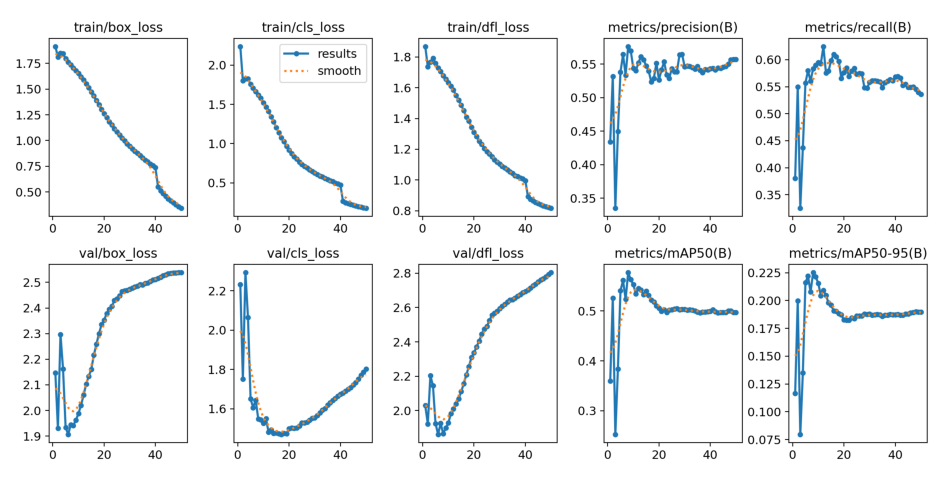

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/ultralytics/runs/detect/pneumonia_aug_results2/results.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

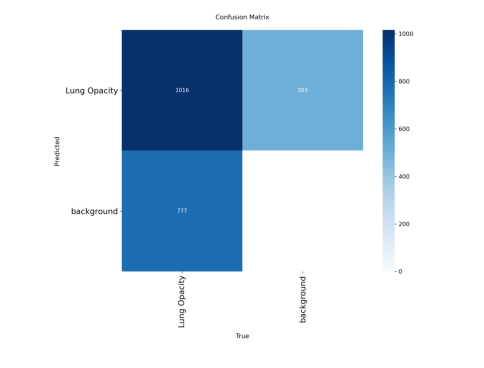

In [14]:
img = Image.open("/content/ultralytics/runs/detect/pneumonia_aug_results2/confusion_matrix.png")
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")

실험 3 - yolov11m 모델 변경

In [3]:
from ultralytics import YOLO

print('🚀 학습 시작')
print('=' * 50)
print('모델: YOLOv11m | 이미지: 640 | 배치: 32 | 에폭: 50')
print('=' * 50)


model = YOLO("yolo11m.pt")

model.train(
    data="/content/rsna-pneumonia-detector-1/data.yaml",
    imgsz=640,
    epochs=50,
    batch=32,
    cache=True,
    patience=50,
    name="pneumonia_results_m",
)

print('\n✅ 학습 완료')

🚀 학습 시작
모델: YOLOv11m | 이미지: 640 | 배치: 32 | 에폭: 50
Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rsna-pneumonia-detector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=pneumonia_results_m, nbs=64, nms=False, opset=None, optimize=Fals

✅ File ready: /content/ultralytics/runs/detect/pneumonia_results_m/results.png


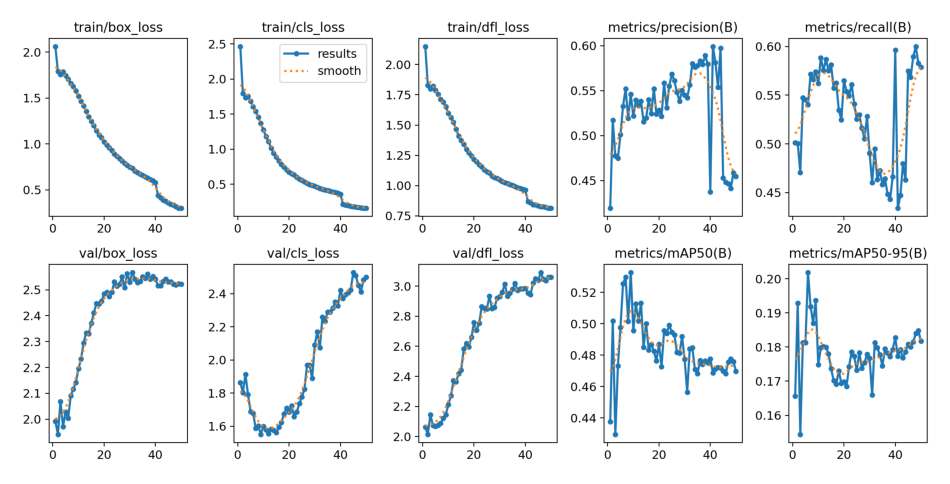

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import time

# ===== 경로 =====
img_path = Path("/content/ultralytics/runs/detect/pneumonia_results_m/results.png")

# ===== 파일 생성 대기 함수 =====
def wait_for_file(path, timeout=180):
    """
    path: Path 객체
    timeout: 최대 대기 시간(초)
    """
    t0 = time.time()
    while time.time() - t0 < timeout:
        if path.exists() and path.stat().st_size > 0:
            return True
        time.sleep(1)
    return False

# ===== 파일 준비될 때까지 대기 =====
ok = wait_for_file(img_path, timeout=180)

if not ok:
    raise FileNotFoundError(f"❌ File not ready after waiting: {img_path}")

print(f"✅ File ready: {img_path}")

# ===== 시각화 =====
img = Image.open(img_path)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

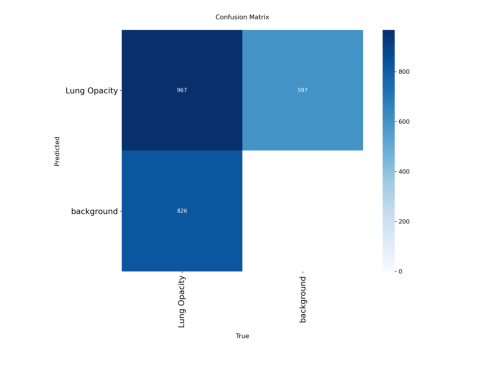

In [6]:
cm_path = Path("/content/ultralytics/runs/detect/pneumonia_results_m/confusion_matrix.png")

if wait_for_file(cm_path, timeout=180):
    img = Image.open(cm_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("⚠️ confusion_matrix.png not found (val(plots=True) 실행 여부 확인)")

실험 5 - 데이터 전처리 후 학습

In [9]:
import os
import shutil
from pathlib import Path
import cv2
import numpy as np
import glob

# =========================
# 설정: 너 데이터셋 루트
# =========================
ROOT = Path("/content/rsna-pneumonia-detector-1")  # <- 너 데이터셋 폴더

# 입력 폴더
TRAIN_IMG = ROOT / "train" / "images"
TRAIN_LBL = ROOT / "train" / "labels"
VAL_IMG   = ROOT / "valid" / "images"
VAL_LBL   = ROOT / "valid" / "labels"
TEST_IMG  = ROOT / "test" / "images"
TEST_LBL  = ROOT / "test" / "labels"

# 출력 폴더(전처리된 데이터셋)
OUT_TRAIN_IMG = ROOT / "train_pp" / "images"
OUT_TRAIN_LBL = ROOT / "train_pp" / "labels"
OUT_VAL_IMG   = ROOT / "valid_pp" / "images"
OUT_VAL_LBL   = ROOT / "valid_pp" / "labels"
OUT_TEST_IMG  = ROOT / "test_pp" / "images"
OUT_TEST_LBL  = ROOT / "test_pp" / "labels"

# 전처리 파라미터
CLIP_LOW  = 0.5
CLIP_HIGH = 99.5

# 저장 확장자 (원본이 png/jpg 섞여 있어도 통일 가능)
SAVE_EXT = ".jpg"  # 통일 원하면 .jpg 추천


# -----------------------------
# 전처리: percentile clip + rescale 0~255
# -----------------------------
def percentile_clip_rescale_gray(gray: np.ndarray, low=0.5, high=99.5) -> np.ndarray:
    """
    gray: uint8 (H,W)
    return: uint8 (H,W) after clipping+rescale
    """
    lo = np.percentile(gray, low)
    hi = np.percentile(gray, high)

    if hi <= lo + 1e-6:
        return gray

    g = gray.astype(np.float32)
    g = np.clip(g, lo, hi)
    g = (g - lo) / (hi - lo)
    g = (g * 255.0).clip(0, 255).astype(np.uint8)
    return g


def preprocess_split(in_img_dir: Path, in_lbl_dir: Path, out_img_dir: Path, out_lbl_dir: Path,
                     clip_low=0.5, clip_high=99.5, save_ext=".jpg"):
    out_img_dir.mkdir(parents=True, exist_ok=True)
    out_lbl_dir.mkdir(parents=True, exist_ok=True)

    img_paths = []
    for ext in ("*.jpg", "*.jpeg", "*.png", "*.bmp"):
        img_paths += glob.glob(str(in_img_dir / ext))
    img_paths = sorted(img_paths)

    if len(img_paths) == 0:
        raise RuntimeError(f"No images found in {in_img_dir}")

    copied_labels = 0
    empty_labels = 0
    missing_labels = 0

    for p in img_paths:
        p = Path(p)
        base = p.stem  # 파일명(확장자 제외)
        in_lbl = in_lbl_dir / f"{base}.txt"

        # 1) 이미지 로드(그레이스케일로)
        gray = cv2.imread(str(p), cv2.IMREAD_GRAYSCALE)
        if gray is None:
            continue

        # 2) 전처리 적용
        gray_pp = percentile_clip_rescale_gray(gray, low=clip_low, high=clip_high)

        # 3) YOLO는 3채널도 잘 받지만, CXR은 그레이 저장해도 무방
        #    다만 저장은 3채널 jpg로 통일하면 훈련 파이프라인에서 안전한 경우가 많음
        bgr_pp = cv2.cvtColor(gray_pp, cv2.COLOR_GRAY2BGR)

        out_img = out_img_dir / f"{base}{save_ext}"
        cv2.imwrite(str(out_img), bgr_pp)

        # 4) 라벨 복사 (없으면 빈 파일 생성)
        out_lbl = out_lbl_dir / f"{base}.txt"
        if in_lbl.exists():
            shutil.copyfile(str(in_lbl), str(out_lbl))
            copied_labels += 1
            # 비어있는 라벨 카운트
            if out_lbl.stat().st_size == 0:
                empty_labels += 1
        else:
            # 라벨이 없는 경우도 있을 수 있으니(예외 케이스) 빈 파일 생성
            out_lbl.write_text("")
            missing_labels += 1
            empty_labels += 1

    print(f"[{in_img_dir.name}] images: {len(img_paths)}")
    print(f"  labels copied: {copied_labels}")
    print(f"  empty labels:  {empty_labels}")
    print(f"  missing labels created empty: {missing_labels}")
    print(f"  output -> {out_img_dir.parent}\n")


# -----------------------------
# 실행: train/valid/test 전처리 생성
# -----------------------------
preprocess_split(TRAIN_IMG, TRAIN_LBL, OUT_TRAIN_IMG, OUT_TRAIN_LBL, CLIP_LOW, CLIP_HIGH, SAVE_EXT)
preprocess_split(VAL_IMG,   VAL_LBL,   OUT_VAL_IMG,   OUT_VAL_LBL,   CLIP_LOW, CLIP_HIGH, SAVE_EXT)
preprocess_split(TEST_IMG,  TEST_LBL,  OUT_TEST_IMG,  OUT_TEST_LBL,  CLIP_LOW, CLIP_HIGH, SAVE_EXT)

# -----------------------------
# data_pp.yaml 생성
# -----------------------------
yaml_pp = ROOT / "data_pp.yaml"
yaml_pp.write_text(
f"""train: {OUT_TRAIN_IMG}
val: {OUT_VAL_IMG}
test: {OUT_TEST_IMG}

nc: 1
names: ['pneumonia']
"""
)

print("✅ Wrote:", yaml_pp)
print("✅ Now train with: data=", yaml_pp)

[images] images: 11796
  labels copied: 11796
  empty labels:  0
  missing labels created empty: 0
  output -> /content/rsna-pneumonia-detector-1/train_pp

[images] images: 1140
  labels copied: 1140
  empty labels:  0
  missing labels created empty: 0
  output -> /content/rsna-pneumonia-detector-1/valid_pp

[images] images: 558
  labels copied: 558
  empty labels:  0
  missing labels created empty: 0
  output -> /content/rsna-pneumonia-detector-1/test_pp

✅ Wrote: /content/rsna-pneumonia-detector-1/data_pp.yaml
✅ Now train with: data= /content/rsna-pneumonia-detector-1/data_pp.yaml


In [10]:
import os, glob, random
from pathlib import Path
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm
import shutil

ROOT = Path("/content/rsna-pneumonia-detector-1")

# 전처리된 데이터
TRAIN_PP_IMG = ROOT / "train_pp" / "images"
TRAIN_PP_LBL = ROOT / "train_pp" / "labels"

VAL_PP_IMG   = ROOT / "valid_pp" / "images"
VAL_PP_LBL   = ROOT / "valid_pp" / "labels"
TEST_PP_IMG  = ROOT / "test_pp" / "images"
TEST_PP_LBL  = ROOT / "test_pp" / "labels"

# 최종 학습용 mix 폴더(원본 pp + clahe 증강본)
TRAIN_MIX_IMG = ROOT / "train_mix" / "images"
TRAIN_MIX_LBL = ROOT / "train_mix" / "labels"

# train_mix를 새로 만들고 싶으면 True
RESET_TRAIN_MIX = True

# ====== 설정 ======
N_AUG_PER_IMAGE = 1      # 각 이미지당 추가로 몇 장 만들지
P_APPLY_CLAHE   = 0.35   # "가끔" 적용 확률 (0.2~0.5 추천)
CLAHE_CLIP      = 2.0
CLAHE_TILE      = (8, 8)
SEED = 42

random.seed(SEED)

def ensure_clean_dir(d: Path):
    if RESET_TRAIN_MIX and d.exists():
        shutil.rmtree(d)
    d.mkdir(parents=True, exist_ok=True)

ensure_clean_dir(TRAIN_MIX_IMG)
ensure_clean_dir(TRAIN_MIX_LBL)

# 1) 먼저 train_pp를 train_mix로 그대로 복사
print("📌 Copying train_pp -> train_mix ...")
pp_imgs = []
for ext in ("*.jpg", "*.jpeg", "*.png"):
    pp_imgs += glob.glob(str(TRAIN_PP_IMG / ext))
pp_imgs = sorted(pp_imgs)

for p in tqdm(pp_imgs):
    p = Path(p)
    base = p.stem
    shutil.copyfile(str(p), str(TRAIN_MIX_IMG / p.name))

    src_lbl = TRAIN_PP_LBL / f"{base}.txt"
    dst_lbl = TRAIN_MIX_LBL / f"{base}.txt"
    if src_lbl.exists():
        shutil.copyfile(str(src_lbl), str(dst_lbl))
    else:
        dst_lbl.write_text("")

# 2) CLAHE 증강 파이프라인 (좌표 불변)
clahe_aug = A.Compose([
    A.CLAHE(clip_limit=CLAHE_CLIP, tile_grid_size=CLAHE_TILE, p=1.0),
])

# 3) 추가 증강본 생성 (train만)
print("📌 Generating CLAHE-aug images (train only) ...")
for p in tqdm(pp_imgs):
    p = Path(p)
    base = p.stem
    img = cv2.imread(str(p), cv2.IMREAD_COLOR)
    if img is None:
        continue

    # 라벨은 그대로 복사 (좌표 변형 없음)
    lbl_src = TRAIN_PP_LBL / f"{base}.txt"
    lbl_text = lbl_src.read_text() if lbl_src.exists() else ""

    for k in range(N_AUG_PER_IMAGE):
        # "가끔" CLAHE 적용: 적용 안 하면 그냥 복제라 의미 없으니 스킵(권장)
        if random.random() > P_APPLY_CLAHE:
            continue

        out_base = f"{base}_clahe{k}"
        out_img_path = TRAIN_MIX_IMG / f"{out_base}.jpg"
        out_lbl_path = TRAIN_MIX_LBL / f"{out_base}.txt"

        aug_img = clahe_aug(image=img)["image"]

        cv2.imwrite(str(out_img_path), aug_img)
        out_lbl_path.write_text(lbl_text)

print("✅ Done. train_mix ready:", TRAIN_MIX_IMG.parent)

📌 Copying train_pp -> train_mix ...


100%|██████████| 11796/11796 [00:03<00:00, 3918.79it/s]


📌 Generating CLAHE-aug images (train only) ...


100%|██████████| 11796/11796 [01:15<00:00, 156.27it/s]

✅ Done. train_mix ready: /content/rsna-pneumonia-detector-1/train_mix


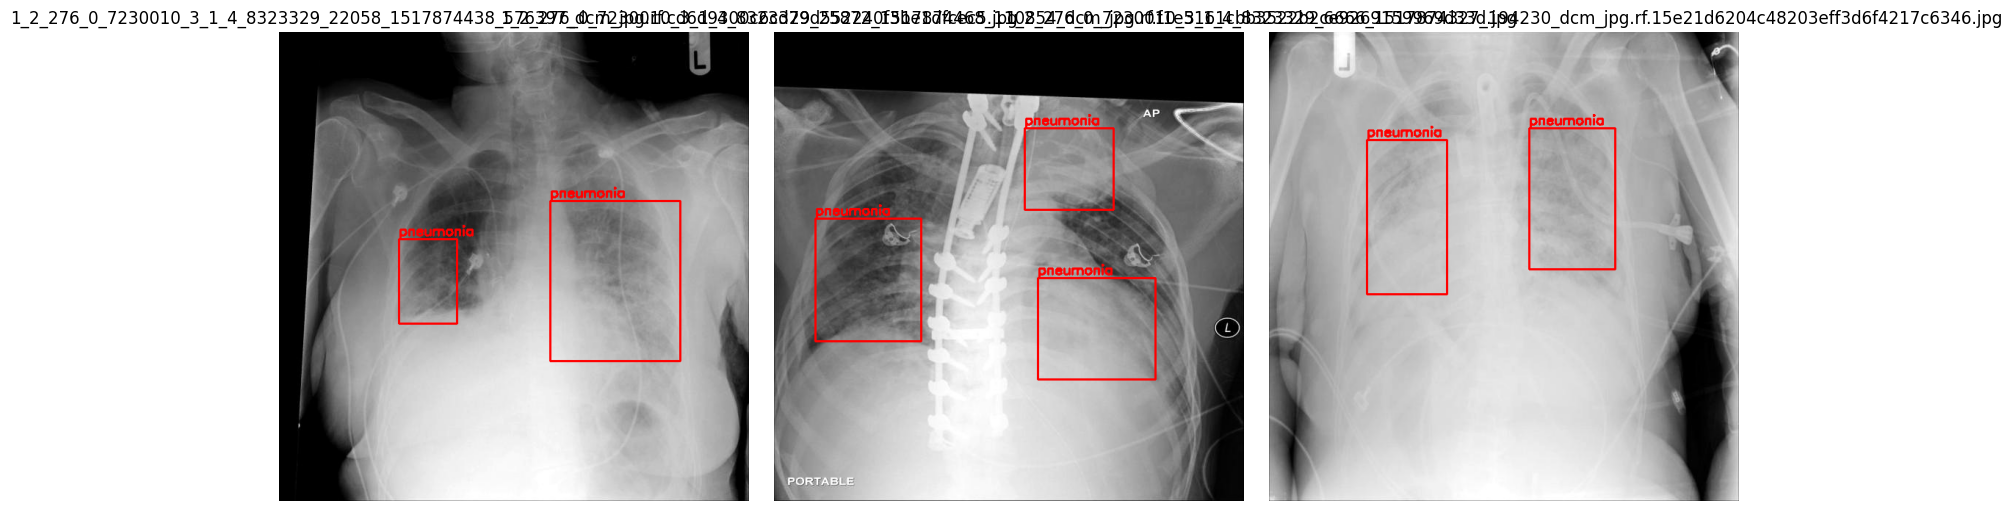

In [13]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# ====== 경로 설정 ======
DATASET_DIR = "/content/rsna-pneumonia-detector-1"
IMAGE_DIR = os.path.join(DATASET_DIR, "train_pp/images")
LABEL_DIR = os.path.join(DATASET_DIR, "train_pp/labels")

# ====== 이미지 목록 ======
image_files = [f for f in os.listdir(IMAGE_DIR) if f.endswith((".jpg", ".png"))]

# 랜덤 3개 선택
sample_images = random.sample(image_files, 3)

# ====== 시각화 ======
plt.figure(figsize=(15, 5))

for idx, img_name in enumerate(sample_images):
    img_path = os.path.join(IMAGE_DIR, img_name)
    label_path = os.path.join(LABEL_DIR, img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

    # 이미지 로드
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # 라벨 파일 있으면 box 그리기
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, x, y, bw, bh = map(float, line.split())

                # YOLO → pixel 좌표 변환
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)

                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(
                    img,
                    "pneumonia",
                    (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (255, 0, 0),
                    2
                )

    # subplot 출력
    plt.subplot(1, 3, idx + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [14]:
yaml_mix = ROOT / "data_mix.yaml"
yaml_mix.write_text(
f"""train: {TRAIN_MIX_IMG}
val: {VAL_PP_IMG}
test: {TEST_PP_IMG}

nc: 1
names: ['pneumonia']
"""
)
print("✅ Wrote:", yaml_mix)

✅ Wrote: /content/rsna-pneumonia-detector-1/data_mix.yaml


In [15]:
from ultralytics import YOLO

model = YOLO("yolo11s.pt")
model.train(
    data="/content/rsna-pneumonia-detector-1/data_mix.yaml",
    imgsz=640,
    epochs=30,
    batch=16,
    cache=False,
    patience=15,
    name="pneumonia_pp_plus_clahe",
)

New https://pypi.org/project/ultralytics/8.4.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rsna-pneumonia-detector-1/data_mix.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=pneumonia_

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fca797596d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

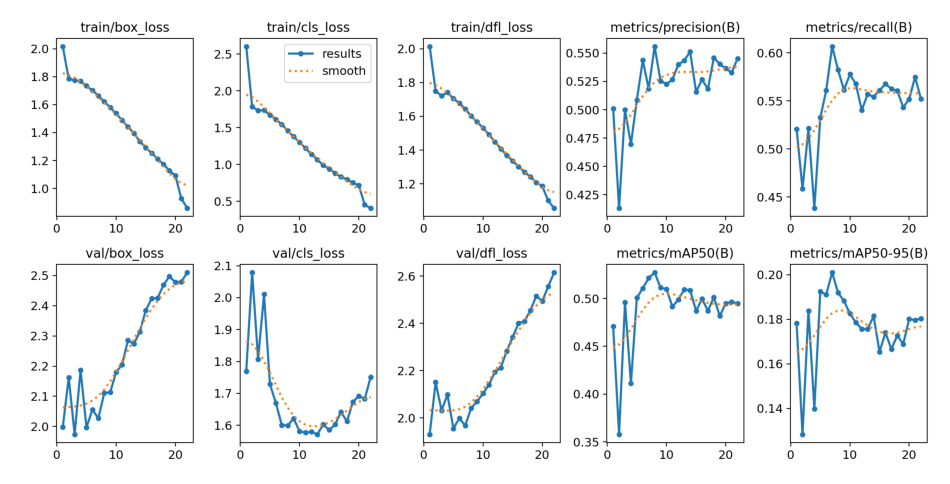

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/ultralytics/runs/detect/pneumonia_pp_plus_clahe/results.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

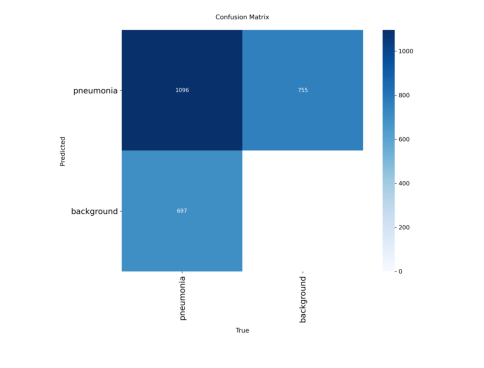

In [17]:
img = Image.open("/content/ultralytics/runs/detect/pneumonia_pp_plus_clahe/confusion_matrix.png")
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")

테스트 이미지 시각화

In [ ]:
import os
import glob
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# =====================
# 경로 설정
# =====================
MODEL_PATH = "/content/ultralytics/runs/detect/pneumonia_pp_plus_clahe/weights/best.pt"

IMG_DIR = "/content/rsna-pneumonia-detector-1/test/images"
LBL_DIR = "/content/rsna-pneumonia-detector-1/test/labels"

NUM_SAMPLES = 6
CONF_THRES = 0.25
IOU_THRES = 0.5

# =====================
# YOLO GT 라벨 읽기
# =====================
def read_yolo_labels(txt_path):
    boxes = []
    if not os.path.exists(txt_path):
        return boxes
    with open(txt_path, "r") as f:
        for line in f:
            cls, x, y, w, h = map(float, line.strip().split())
            boxes.append((int(cls), x, y, w, h))
    return boxes

def yolo_to_xyxy(box, W, H):
    cls, x, y, w, h = box
    xc, yc = x * W, y * H
    bw, bh = w * W, h * H
    x1 = int(xc - bw / 2)
    y1 = int(yc - bh / 2)
    x2 = int(xc + bw / 2)
    y2 = int(yc + bh / 2)
    return cls, x1, y1, x2, y2

# =====================
# 모델 로드
# =====================
model = YOLO(MODEL_PATH)

# =====================
# 랜덤 이미지 선택
# =====================
img_paths = glob.glob(os.path.join(IMG_DIR, "*.jpg")) + glob.glob(os.path.join(IMG_DIR, "*.png"))
samples = random.sample(img_paths, k=NUM_SAMPLES)

plt.figure(figsize=(18, 10))

for i, img_path in enumerate(samples):
    base = os.path.splitext(os.path.basename(img_path))[0]
    lbl_path = os.path.join(LBL_DIR, base + ".txt")

    img = cv2.imread(img_path)
    H, W = img.shape[:2]

    # -----------------
    # GT 박스 (초록)
    # -----------------
    gt_boxes = read_yolo_labels(lbl_path)
    for b in gt_boxes:
        _, x1, y1, x2, y2 = yolo_to_xyxy(b, W, H)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, "GT", (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # -----------------
    # 예측 박스 (빨강)
    # -----------------
    results = model.predict(
        source=img_path,
        conf=CONF_THRES,
        iou=IOU_THRES,
        save=False,
        verbose=False
    )

    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, f"PRED {conf:.2f}", (x1, y2 + 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # -----------------
    # 시각화
    # -----------------
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title(base, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

실험 4 - 하이퍼파라미터 변경

In [18]:
from ultralytics import YOLO

print('🚀 학습 시작')
print('=' * 50)
print('모델: YOLOv11s | 이미지: 768 | 배치: 16 | 에폭: 100')
print('=' * 50)


model = YOLO("yolo11s.pt")

model.train(
    data="/content/rsna-pneumonia-detector-1/data.yaml",
    imgsz=768,
    epochs=50,
    batch=16,
    cache=True,
    patience=30,
    name="pneumonia_results5",
)

print('\n✅ 학습 완료')

🚀 학습 시작
모델: YOLOv11s | 이미지: 768 | 배치: 16 | 에폭: 100
New https://pypi.org/project/ultralytics/8.4.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rsna-pneumonia-detector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937

(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

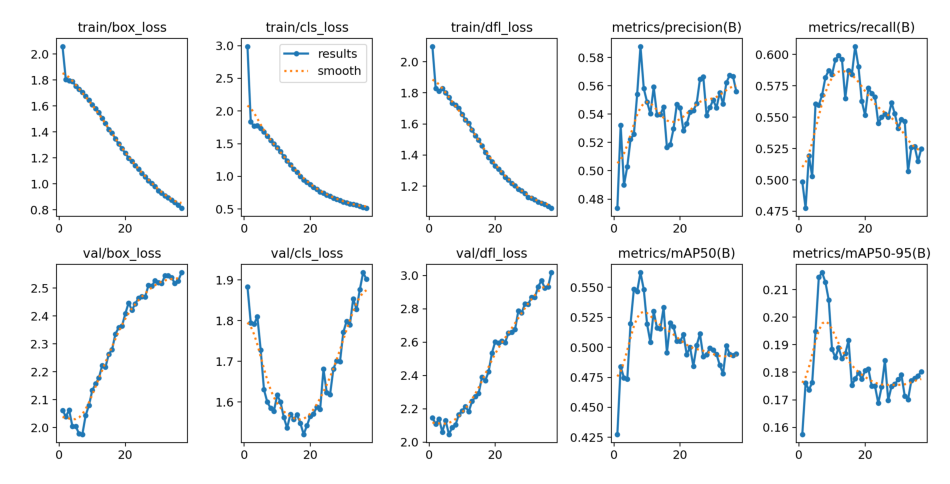

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/ultralytics/runs/detect/pneumonia_results5/results.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

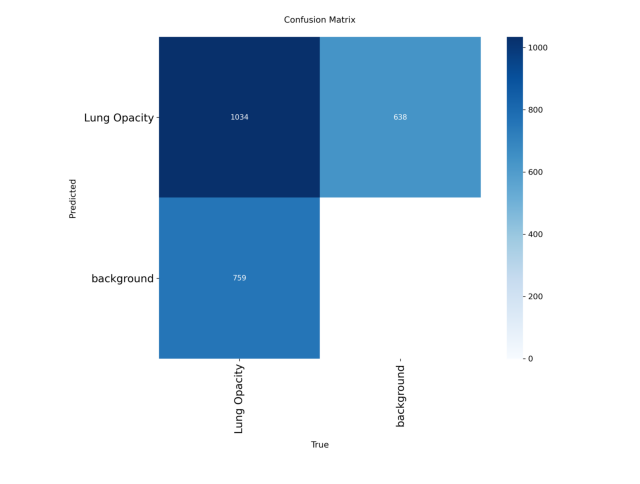

In [21]:
img = Image.open("/content/ultralytics/runs/detect/pneumonia_results5/confusion_matrix.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")

In [ ]:
# 학습 후 검증(베스트 가중치로)
val_res = model.val(data="/content/rsna-pneumonia-detector-1/data.yaml", imgsz=640, device=0)

실험 1과 5 융합 - 대비/밝기 + 이미지사이즈 키우기

In [22]:
import os
import glob
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm

# -----------------------------
# 유틸: YOLO 라벨 읽기/쓰기
# -----------------------------
def read_yolo_labels(txt_path):
    boxes = []
    if not os.path.exists(txt_path):
        return boxes
    with open(txt_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x, y, w, h = parts
            x, y, w, h = float(x), float(y), float(w), float(h)
            if w <= 0 or h <= 0:
                continue
            boxes.append((int(cls), x, y, w, h))
    return boxes

def write_yolo_labels(txt_path, boxes):
    os.makedirs(os.path.dirname(txt_path), exist_ok=True)
    with open(txt_path, "w") as f:
        for cls, x, y, w, h in boxes:
            f.write(f"{cls} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")

# -----------------------------
# CXR용 증강 : 명암/대비/감마/CLAHE/밝기 추가
# -----------------------------
def build_cxr_augment_intensity_only():
    return A.Compose(
        [
            A.OneOf([
                # ✅ 밝기만 ±15% (contrast=0으로 고정)
                A.RandomBrightnessContrast(
                    brightness_limit=0.15, contrast_limit=0.0, p=1.0
                ),

                # ✅ 대비만 ±15% (brightness=0으로 고정)
                A.RandomBrightnessContrast(
                    brightness_limit=0.0, contrast_limit=0.15, p=1.0
                ),

                # ✅ 감마 보정
                A.RandomGamma(gamma_limit=(85, 115), p=1.0),

                # ✅ CLAHE
                A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=1.0),
            ], p=1.0),
        ]
    )

# -----------------------------
# 메인: 폴더 단위 증강 (images + labels)
# -----------------------------
def augment_yolo_dataset_intensity_only(
    images_dir,
    labels_dir,
    out_images_dir,
    out_labels_dir,
    n_aug_per_image=1,
    force_single_class=True
):
    os.makedirs(out_images_dir, exist_ok=True)
    os.makedirs(out_labels_dir, exist_ok=True)

    aug = build_cxr_augment_intensity_only()

    img_paths = []
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        img_paths.extend(glob.glob(os.path.join(images_dir, ext)))

    print(f"Found images: {len(img_paths)}")

    for img_path in tqdm(img_paths):
        base = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(labels_dir, base + ".txt")

        # 이미지 로드 (grayscale -> 3채널)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        yolo_boxes = read_yolo_labels(label_path)

        # RSNA 단일 클래스 통일(선택)
        if force_single_class and len(yolo_boxes) > 0:
            yolo_boxes = [(0, x, y, w, h) for (cls, x, y, w, h) in yolo_boxes]

        for k in range(n_aug_per_image):
            transformed = aug(image=img_bgr)
            aug_img = transformed["image"]

            out_name = f"{base}_aug{k}"
            out_img_path = os.path.join(out_images_dir, out_name + ".jpg")
            out_lbl_path = os.path.join(out_labels_dir, out_name + ".txt")

            cv2.imwrite(out_img_path, aug_img)
            # 좌표 변형 없으므로 라벨 그대로 저장
            write_yolo_labels(out_lbl_path, yolo_boxes)

    print("Done intensity-only augmentation!")


train_images = "/content/rsna-pneumonia-detector-1/train/images"
train_labels = "/content/rsna-pneumonia-detector-1/train/labels"

out_train_images = "/content/rsna-pneumonia-detector-1/train_fin/images"
out_train_labels = "/content/rsna-pneumonia-detector-1/train_fin/labels"

augment_yolo_dataset_intensity_only(
    images_dir=train_images,
    labels_dir=train_labels,
    out_images_dir=out_train_images,
    out_labels_dir=out_train_labels,
    n_aug_per_image=2,
    force_single_class=True
)

Found images: 11796


100%|██████████| 11796/11796 [02:04<00:00, 94.55it/s]

Done intensity-only augmentation!


In [ ]:
from ultralytics import YOLO

print('🚀 학습 시작')
print('=' * 50)
print('모델: YOLOv11s | 이미지: 768 | 배치: 16 | 에폭: 50')
print('=' * 50)


model = YOLO("yolo11s.pt")

model.train(
    data="/content/rsna-pneumonia-detector-1/data.yaml",
    imgsz=768,
    epochs=50,
    batch=16,
    cache=True,
    patience=40,
    name="pneumonia_results_fin",
)

print('\n✅ 학습 완료')

🚀 학습 시작
모델: YOLOv11s | 이미지: 768 | 배치: 16 | 에폭: 100
New https://pypi.org/project/ultralytics/8.4.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rsna-pneumonia-detector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/ultralytics/runs/detect/pneumonia_results_fin/results.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")

In [ ]:
img = Image.open("/content/ultralytics/runs/detect/pneumonia_results_fin/confusion_matrix.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")